# Predicting the Survival of Newborn Goats based on Follow-up Variables

# About the data-set

The datasets consist of several predictor (independent) variables and one target (dependent) variable,
Outcome that are documented during my follow-up to the selected goat farms. Independent variables include the Time of 1st coll, Method of co. feeding, Amount of liquid diet, Parity of the dam, Weaning age, Cleaness of the barn, Housing, Education, Herd size, Age of the farm, Source of income, Owner ship, Sex of cc and Experience.

# Aims

To build a machine learning model that accurately predict whether or not the Newborn kids in the dataset
will survive or not?

# Libraries

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import sklearn
import os 
import joblib
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
import imblearn
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize = 16)
mpl.rc('xtick', labelsize = 16)
mpl.rc('ytick', labelsize = 16)

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
np.random.seed(42)

# Data importation and Exploration

In [3]:
df = pd.read_csv('Survival.csv')

In [4]:
df.head()

,Event,Time of 1st coll,Method of co. feeding,Amount of liquid diet,Parity of the dam,Weaning age,Cleaness of the barn,Housing,Education,Herd size,Age of the farm,Source of income,Owner ship,Sex of cc,Experience
0,1,2,1,4,2,0,2,2,3,2,9,1,1,2,1
1,0,1,2,4,2,5,2,2,2,4,20,1,1,2,1
2,0,1,1,7,2,3,2,1,2,3,25,1,1,1,1
3,0,1,1,6,2,3,2,1,2,3,25,1,1,1,1
4,1,2,1,3,1,2,1,1,4,2,4,1,1,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Event                  184 non-null    int64
 1   Time of 1st coll       184 non-null    int64
 2   Method of co. feeding  184 non-null    int64
 3   Amount of liquid diet  184 non-null    int64
 4   Parity of the dam      184 non-null    int64
 5   Weaning age            184 non-null    int64
 6   Cleaness of the barn   184 non-null    int64
 7   Housing                184 non-null    int64
 8   Education              184 non-null    int64
 9   Herd size              184 non-null    int64
 10  Age of the farm        184 non-null    int64
 11  Source of income       184 non-null    int64
 12  Owner ship             184 non-null    int64
 13  Sex of cc              184 non-null    int64
 14  Experience             184 non-null    int64
dtypes: int64(15)
memory usage: 21.7 KB


In [6]:
df.isna().sum()

Event                    0
Time of 1st coll         0
Method of co. feeding    0
Amount of liquid diet    0
Parity of the dam        0
Weaning age              0
Cleaness of the barn     0
Housing                  0
Education                0
Herd size                0
Age of the farm          0
Source of income         0
Owner ship               0
Sex of cc                0
Experience               0
dtype: int64

In [7]:
df["Event"].value_counts()

0    105
1     79
Name: Event, dtype: int64

In [8]:
df.describe() 

,Event,Time of 1st coll,Method of co. feeding,Amount of liquid diet,Parity of the dam,Weaning age,Cleaness of the barn,Housing,Education,Herd size,Age of the farm,Source of income,Owner ship,Sex of cc,Experience
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,0.429348,1.445652,1.543478,3.646739,1.695652,2.478261,1.483696,1.603261,3.103261,3.798913,10.065217,1.597826,1.380435,1.554348,1.298913
std,0.496334,0.498394,0.499465,1.284711,0.461386,1.342685,0.501098,0.490556,1.243646,2.549574,6.942865,0.491675,0.486818,0.498394,0.459031
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,2.000000,4.000000,2.000000,3.000000,1.000000,2.000000,4.000000,3.000000,9.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,2.000000,4.000000,5.000000,15.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,2.000000,2.000000,8.000000,2.000000,5.000000,2.000000,2.000000,5.000000,14.000000,28.000000,2.000000,2.000000,2.000000,2.000000


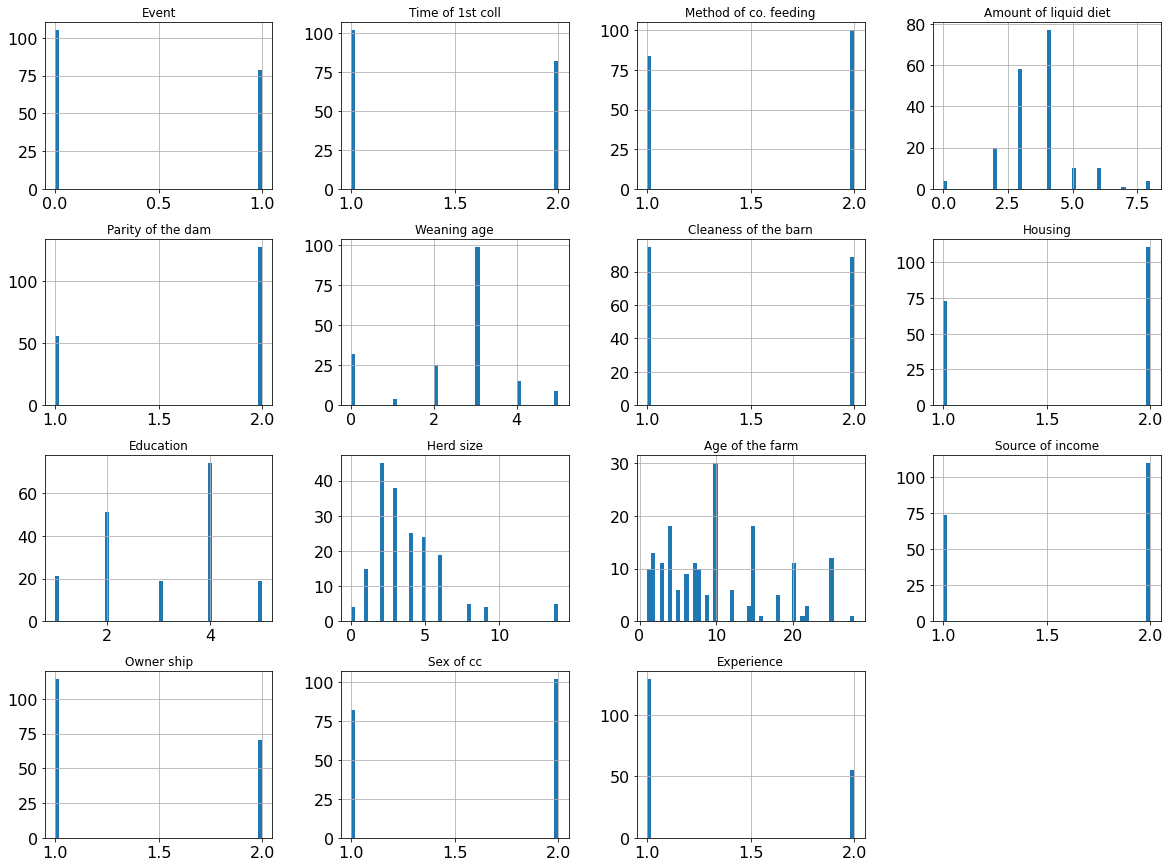

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

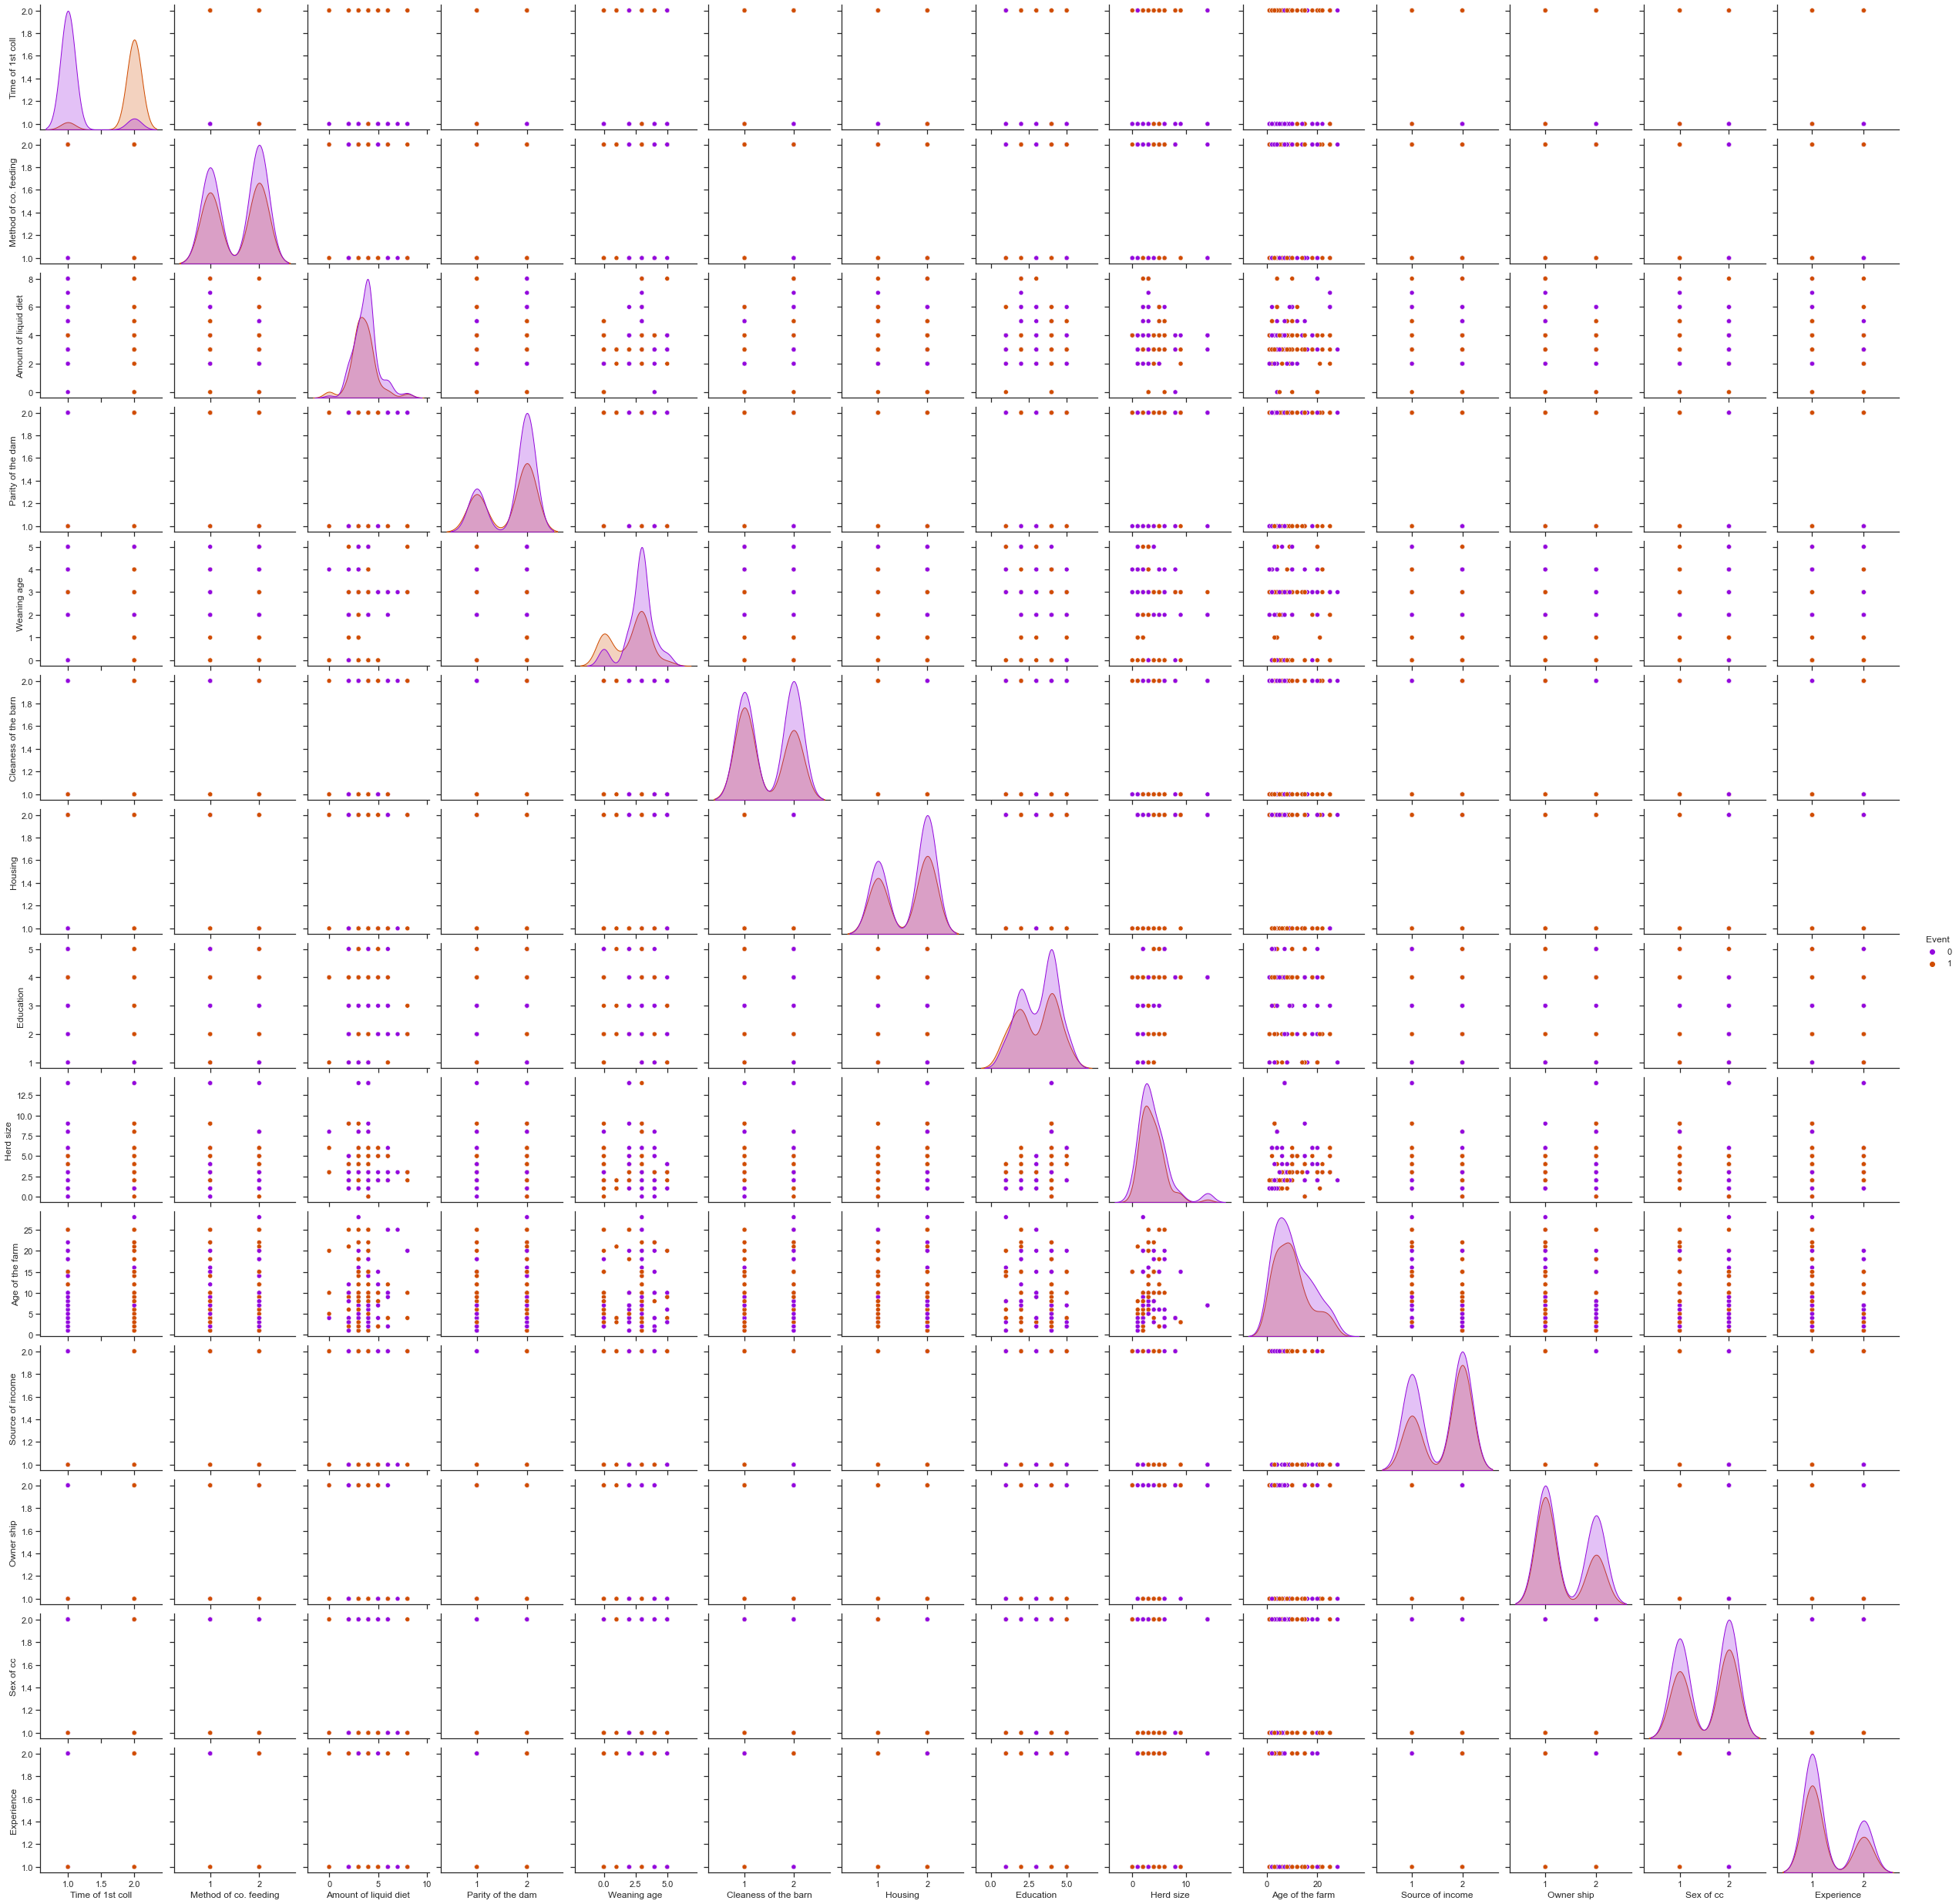

In [10]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Event',palette='gnuplot')

# Removing Outlier 

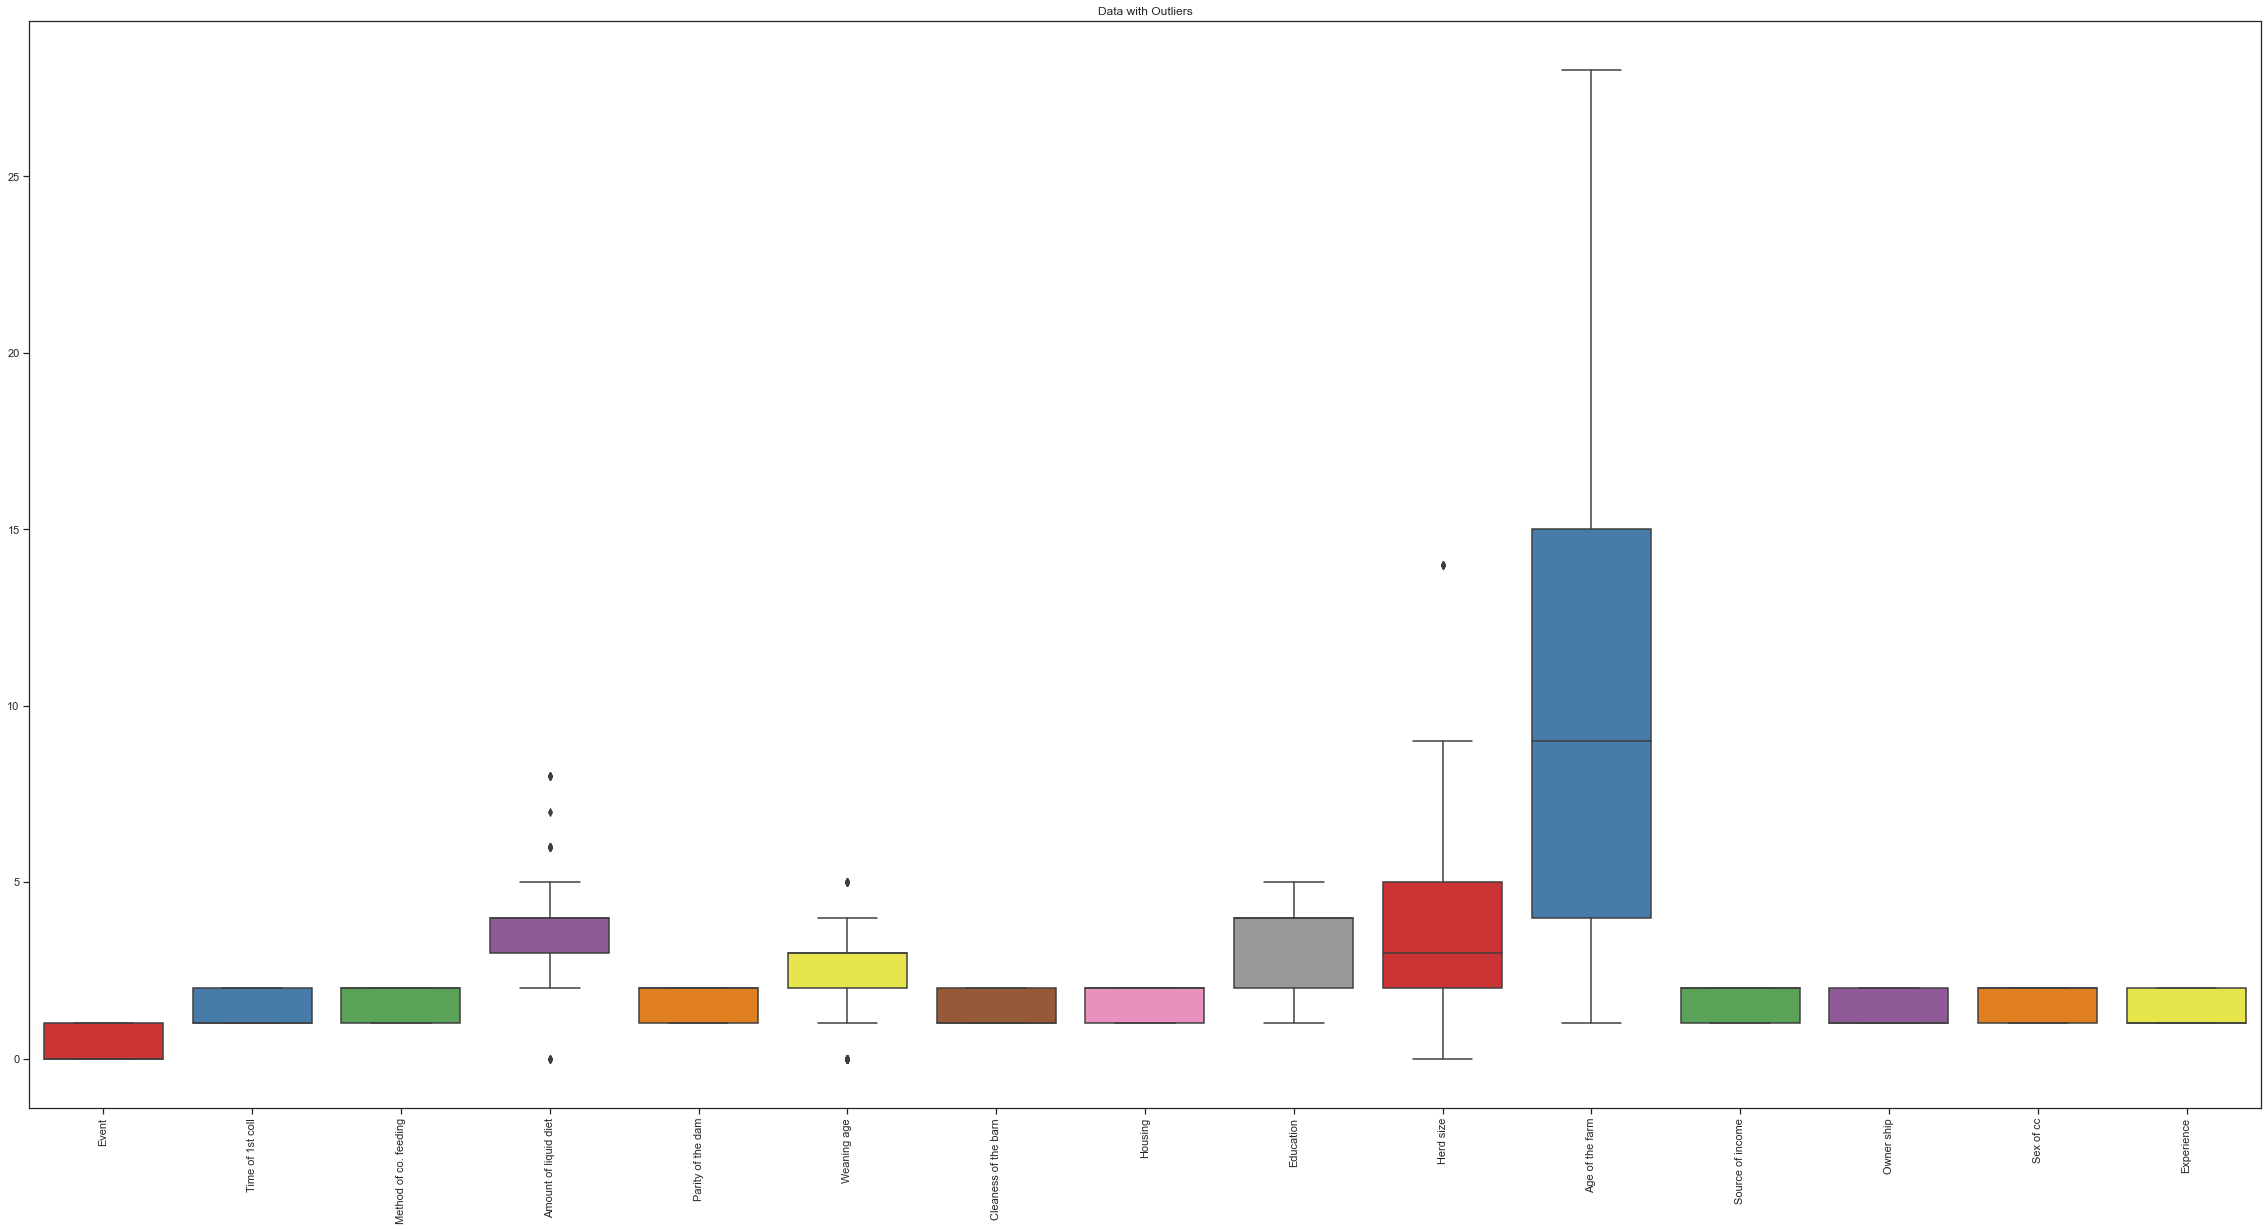

In [11]:
#df.plot(kind="box",subplots=True,figsize=(25,5),title="Data with Outliers")
# size of the graph
plt.figure(figsize=(40,20))

# ploting the box plot
sns.boxplot(data = df, palette = "Set1").set(title='Data with Outliers')
plt.xticks(rotation=90)

# showing the graph
plt.show()

In [12]:
columns = ['Event', 'Time of 1st coll', 'Method of co. feeding', 'Amount of liquid diet', 'Parity of the dam', 'Weaning age', 'Cleaness of the barn', 'Housing', 'Education', 'Herd size', 'Age of the farm', 'Source of income', 'Owner ship', 'Sex of cc', 'Experience']

In [13]:
 def outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = (q1 - (1.5 * iqr))
    upper_bound = (q3 + (1.5 * iqr))
    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return ls

In [14]:
index_list = []
for feature in ['Event', 'Time of 1st coll', 'Method of co. feeding', 'Amount of liquid diet', 'Parity of the dam', 'Weaning age', 'Cleaness of the barn', 'Housing', 'Education', 'Herd size', 'Age of the farm', 'Source of income', 'Owner ship', 'Sex of cc', 'Experience']:
    index_list.extend(outlier(df, feature))

In [15]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [16]:
df_cleaned = remove(df, index_list)

In [17]:
df_cleaned 

,Event,Time of 1st coll,Method of co. feeding,Amount of liquid diet,Parity of the dam,Weaning age,Cleaness of the barn,Housing,Education,Herd size,Age of the farm,Source of income,Owner ship,Sex of cc,Experience
4,1,2,1,3,1,2,1,1,4,2,4,1,1,2,2
7,0,1,2,3,2,3,2,1,5,4,15,2,1,1,1
8,1,1,1,3,2,3,2,1,5,4,15,2,1,1,1
9,0,1,1,4,1,2,1,1,4,6,4,1,1,2,2
13,0,1,2,4,2,3,2,2,4,6,6,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,1,2,2,2,2,2,2,5,5,10,1,2,1,1
172,0,1,2,3,2,4,2,2,3,2,20,2,1,2,1
174,0,1,1,3,1,3,2,2,4,3,5,2,2,2,1
180,1,2,2,3,2,3,1,2,5,4,15,2,1,1,1


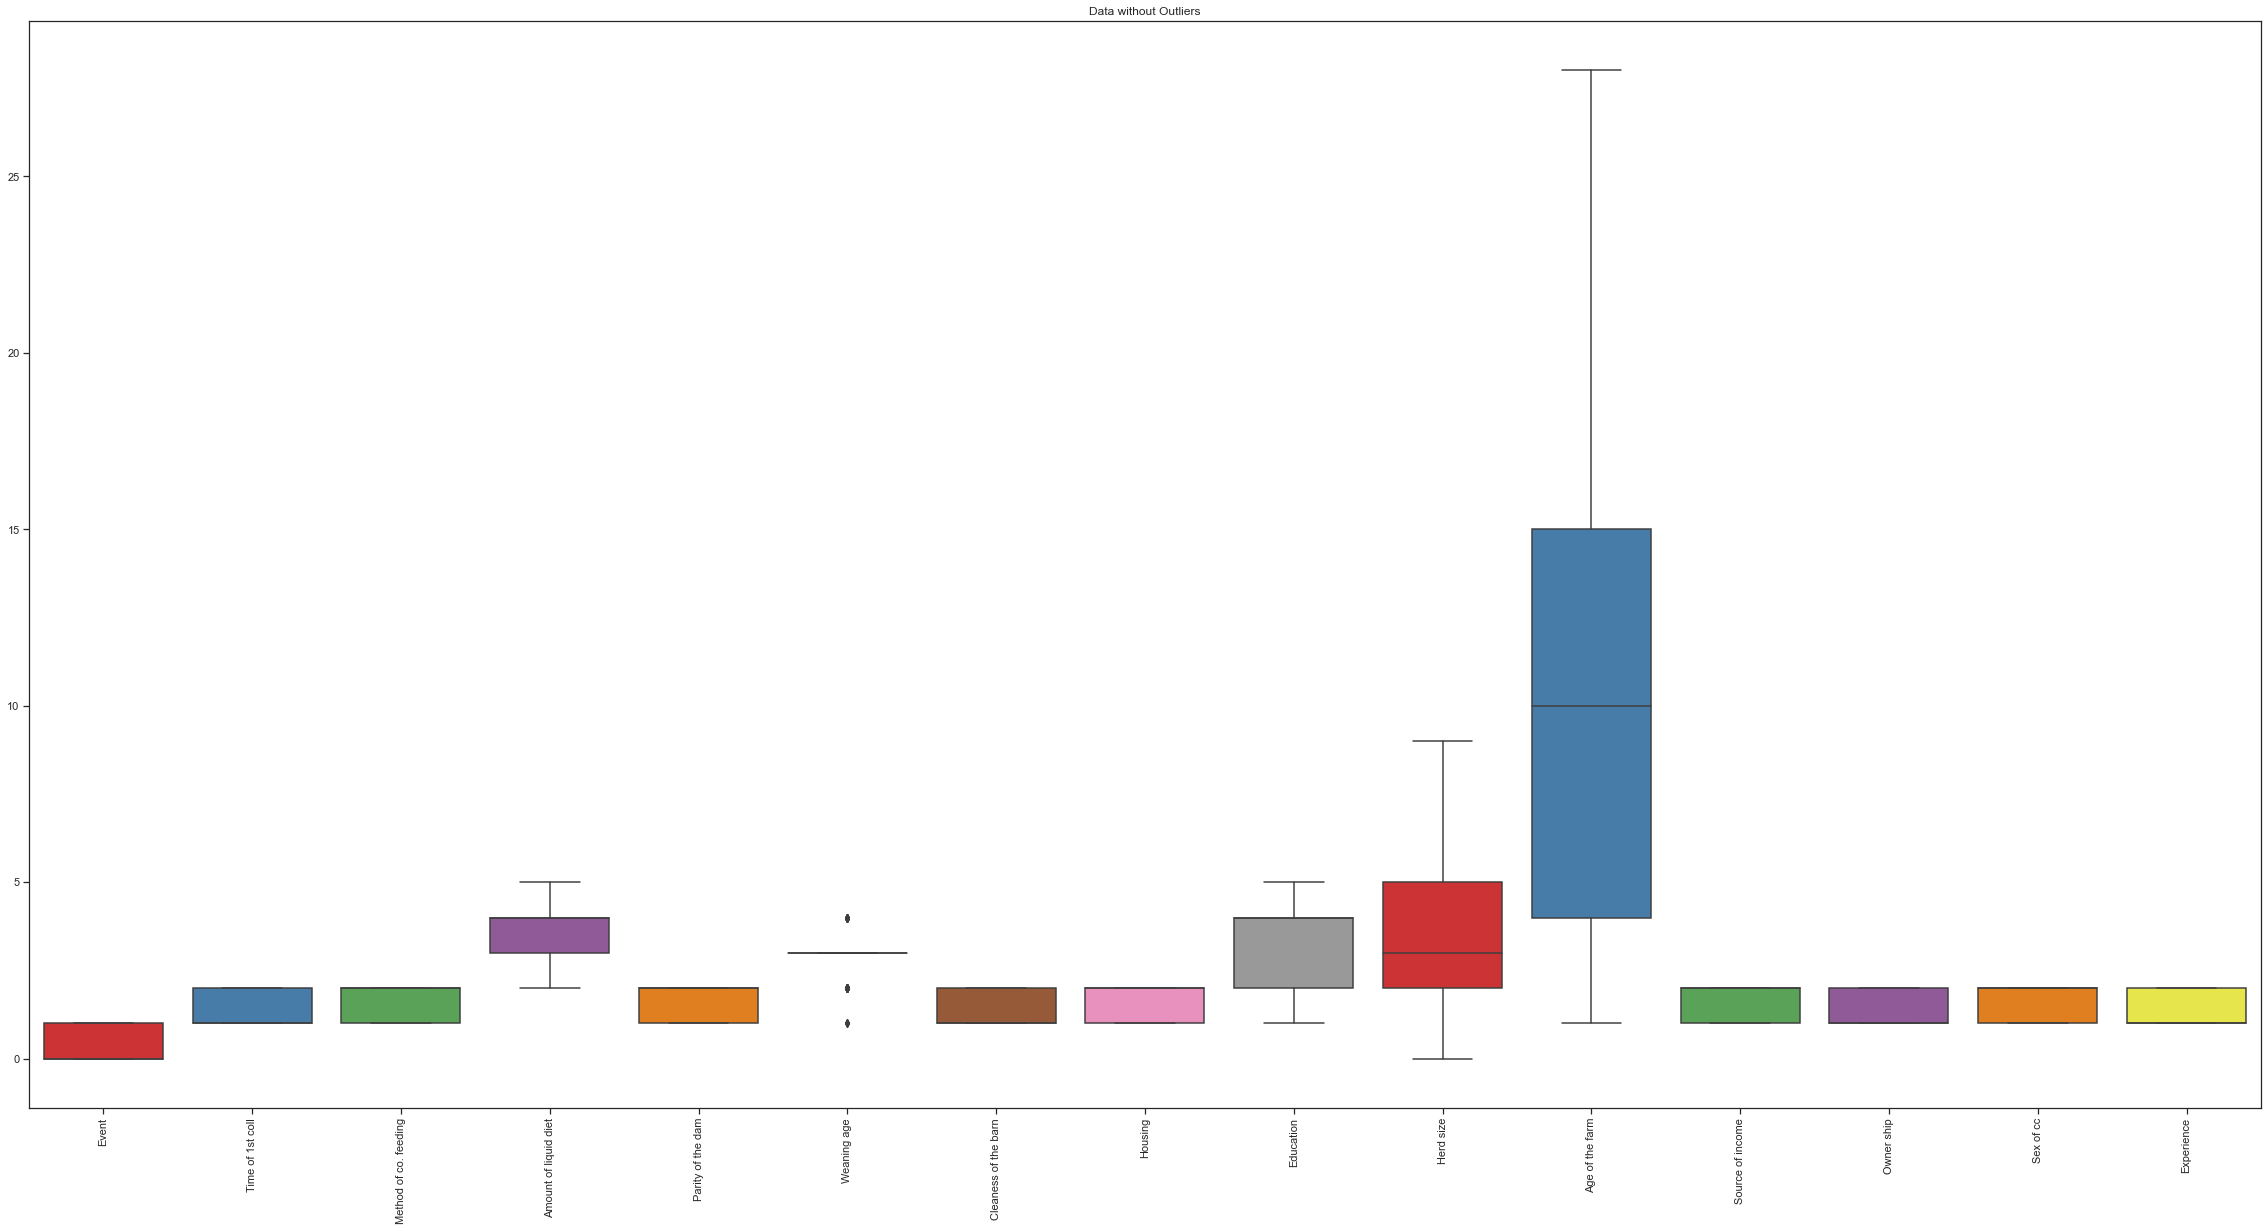

In [18]:
#df.plot(kind="box",subplots=True,figsize=(25,5),title="Data with Outliers")
# size of the graph
plt.figure(figsize=(40,20))

# ploting the box plot
sns.boxplot(data = df_cleaned, palette = "Set1").set(title= 'Data without Outliers')
plt.xticks(rotation=90)

# showing the graph
plt.show()

# Feature selections by using of Correlation matrix

In [19]:
df_cleaned.corr()

,Event,Time of 1st coll,Method of co. feeding,Amount of liquid diet,Parity of the dam,Weaning age,Cleaness of the barn,Housing,Education,Herd size,Age of the farm,Source of income,Owner ship,Sex of cc,Experience
Event,1.000000,0.812903,0.036041,-0.170487,-0.120619,-0.200228,0.012215,0.038196,-0.114649,0.005770,-0.038031,0.123217,-0.157819,0.069625,-0.092851
Time of 1st coll,0.812903,1.000000,-0.016324,-0.179723,-0.073207,-0.222967,0.029751,0.051572,-0.209162,-0.015048,0.060788,0.100910,-0.100910,0.084067,-0.068595
Method of co. feeding,0.036041,-0.016324,1.000000,0.097842,0.295126,-0.056050,0.080845,0.083250,-0.225710,0.126037,0.042969,0.042307,-0.212367,-0.023349,0.054590
Amount of liquid diet,-0.170487,-0.179723,0.097842,1.000000,0.072593,0.310149,-0.178327,-0.209618,-0.112082,-0.002218,0.128001,-0.011260,0.011260,-0.115536,-0.117803
Parity of the dam,-0.120619,-0.073207,0.295126,0.072593,1.000000,-0.015295,0.134262,0.002306,-0.043102,0.093836,0.147015,-0.058881,0.058881,-0.229447,-0.147892
Weaning age,-0.200228,-0.222967,-0.056050,0.310149,-0.015295,1.000000,-0.114188,-0.015281,-0.083529,0.009195,0.045652,0.023625,0.083999,-0.003822,-0.289021
Cleaness of the barn,0.012215,0.029751,0.080845,-0.178327,0.134262,-0.114188,1.000000,0.236389,0.036275,0.024294,0.186943,-0.026390,-0.041235,-0.017610,0.004805
Housing,0.038196,0.051572,0.083250,-0.209618,0.002306,-0.015281,0.236389,1.000000,0.034697,0.015048,-0.204053,0.002523,-0.037000,0.083250,-0.002306
Education,-0.114649,-0.209162,-0.225710,-0.112082,-0.043102,-0.083529,0.036275,0.034697,1.000000,0.178094,-0.214445,0.140396,0.268815,-0.199232,0.029077
Herd size,0.005770,-0.015048,0.126037,-0.002218,0.093836,0.009195,0.024294,0.015048,0.178094,1.000000,0.074195,-0.282223,0.246729,-0.382103,-0.221571


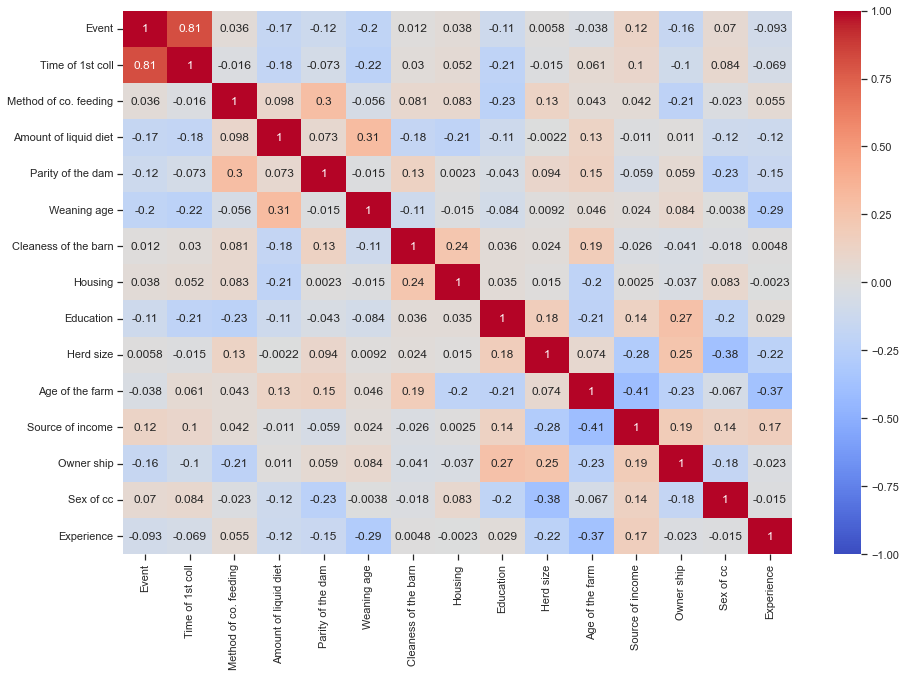

In [20]:
corr_matrix = df_cleaned.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Ceating train-test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_cleaned.drop("Event",axis=1)
y = df_cleaned["Event"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2, random_state= 42)

In [23]:
X_train.shape, X_test.shape

((98, 14), (25, 14))

# Comparing different Algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
logistic_reg = LogisticRegression(random_state=0)
logistic_reg.fit(X_train,y_train);
## Evaluating the model
logistic_reg = logistic_reg.score(X_test,y_test)

In [25]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [26]:
## Build a Random forest classifier model
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [27]:
## Build Support Vector Machine
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [28]:
model_fitting_comparison = pd.DataFrame({"Logistic Regression":logistic_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [29]:
model_fitting_comparison

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.96,0.68,0.96,0.52


# Pipeline creation

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [31]:
cols_to_scale =  ['Time of 1st coll', 'Method of co. feeding', 'Amount of liquid diet', 'Parity of the dam', 'Weaning age', 'Cleaness of the barn', 'Housing', 'Education', 'Herd size', 'Age of the farm', 'Source of income', 'Owner ship', 'Sex of cc', 'Experience']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(remainder='drop',
                                 transformers=[('num', numeric_transformer, cols_to_scale)])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('sampling', SMOTE(random_state= 42, n_jobs=-1, sampling_strategy='auto', k_neighbors= 5)), 
                        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
                        ])

In [32]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time of 1st coll',
                                                   'Method of co. feeding',
                                                   'Amount of liquid diet',
                                                   'Parity of the dam',
                                                   'Weaning age',
                                                   'Cleaness of the barn',
                                                   'Housing', 'Education',
                                                   'Herd size',
                                                   'Age of the farm',
                                                   'Source of income',
                             

In [33]:
clf.score(X_test,y_test)

0.92

# Model evluation

In [34]:
y_final_train = clf.predict(X_train)

In [35]:
y_final_test = clf.predict(X_test)

In [36]:
print(classification_report(y_train, y_final_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        36

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



In [37]:
print(classification_report(y_test, y_final_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



# Fine tuning and Hyperparametrization

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)


rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

In [39]:
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df;

Best: [0.83684211 0.84578947 0.87684211 0.83578947 0.87631579 0.85578947
 0.84578947 0.85578947 0.85578947], using {'max_depth': 2, 'n_estimators': 256}


In [40]:
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

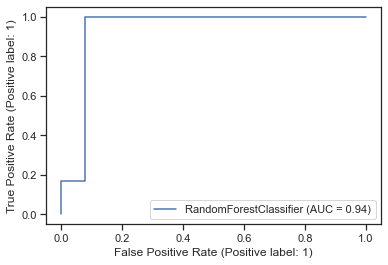

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
#plot_roc_curve(gs_log_reg,X_test,y_test)
plot_roc_curve(best_clf,X_test,y_test);

In [43]:
grid_results.score(X_test,y_test)

0.88

# Confusion Matrix 

In [44]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[12  1]
 [ 2 10]]


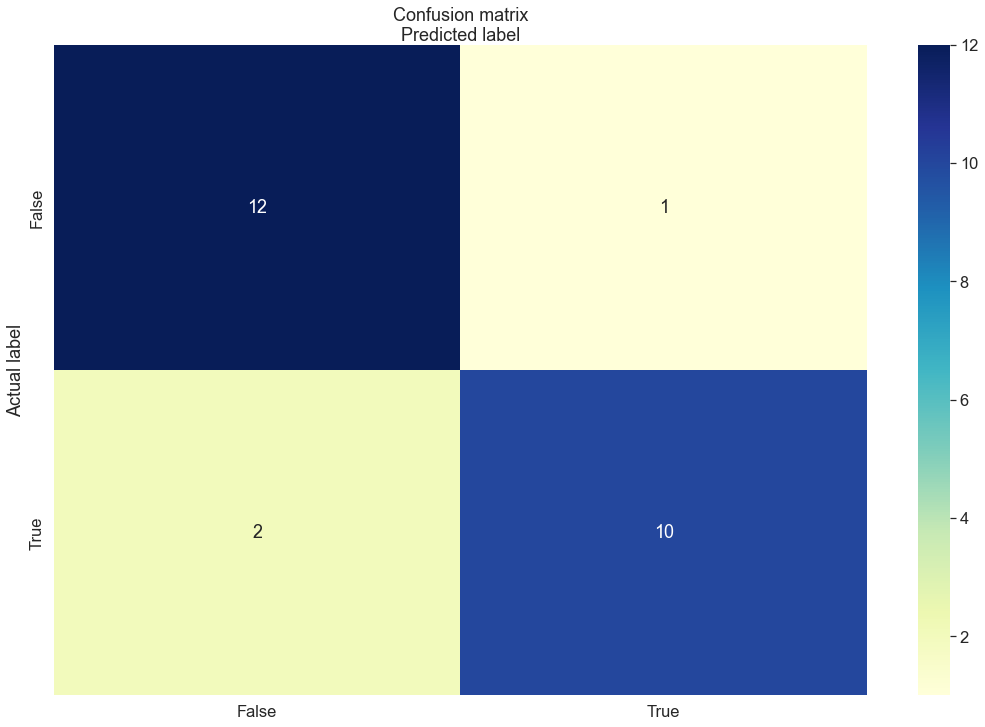

In [45]:
sns.set(font_scale=1.5)
import seaborn as sns
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

In [46]:
# The confusion matrix shows the results of the best model as returned by the grid search technique. 
# This optimal model has correctly classified that 12 goat kids would not survive and that 11 passengers would survive.
# In 2 cases, the model was wrong. The result is an overall model accuracy of 88 %, 
# which shows that the best grid search model outperforms our initial best guess model.

In [47]:
# Check best hyperparameters
grid_results.best_params_

{'max_depth': 2, 'n_estimators': 256}

# Feature importance

In [48]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.84615385, 0.76923077, 1.        , 0.91666667, 1.        ,
       0.91666667, 1.        , 0.83333333, 0.83333333, 0.83333333])

In [49]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8948717948717949

In [50]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8766666666666666

In [51]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8550000000000001

In [52]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8594444444444445

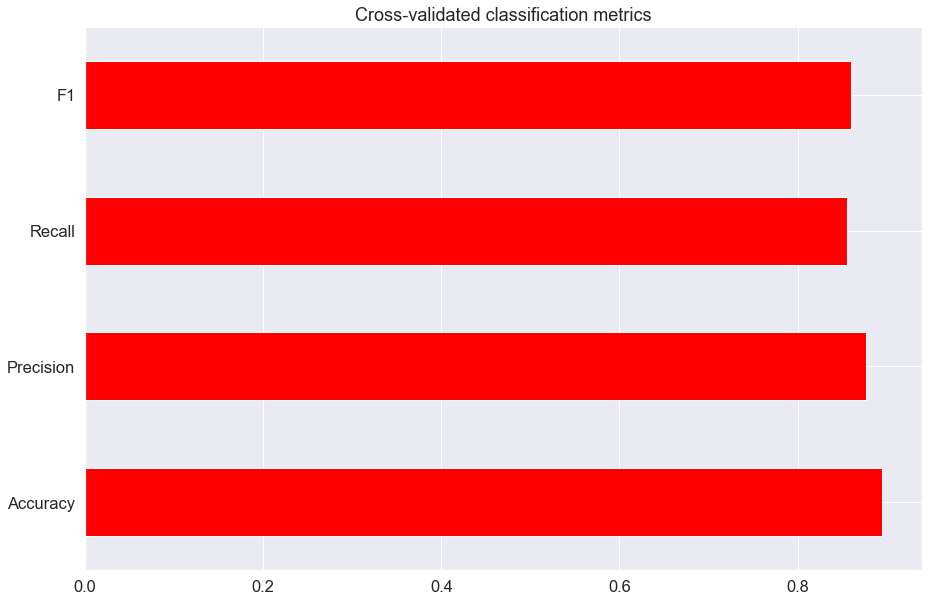

In [53]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.barh(title="Cross-validated classification metrics",
                      color = 'Red',  legend=False, figsize=(15,10));

In [54]:
# Fit Random forest classifier instance  
clf = RandomForestClassifier(max_depth = 2, n_estimators = 256)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=256)

In [55]:
clf.feature_importances_

array([0.36306465, 0.00980296, 0.10761547, 0.04411146, 0.04433054,
       0.03772334, 0.02605471, 0.04117901, 0.09683678, 0.0947598 ,
       0.02646762, 0.07639493, 0.0066198 , 0.02503892])

In [56]:
feature_dict = dict(zip(cols_to_scale, list(clf.feature_importances_)))
feature_dict

{'Time of 1st coll': 0.3630646478232207,
 'Method of co. feeding': 0.009802964776296604,
 'Amount of liquid diet': 0.10761546849710746,
 'Parity of the dam': 0.04411145695410751,
 'Weaning age': 0.04433054266681119,
 'Cleaness of the barn': 0.03772334082778385,
 'Housing': 0.026054711336124265,
 'Education': 0.04117900922986207,
 'Herd size': 0.0968367849042006,
 'Age of the farm': 0.0947597988309552,
 'Source of income': 0.02646761871802413,
 'Owner ship': 0.07639493246175572,
 'Sex of cc': 0.006619802053497013,
 'Experience': 0.02503892092025367}

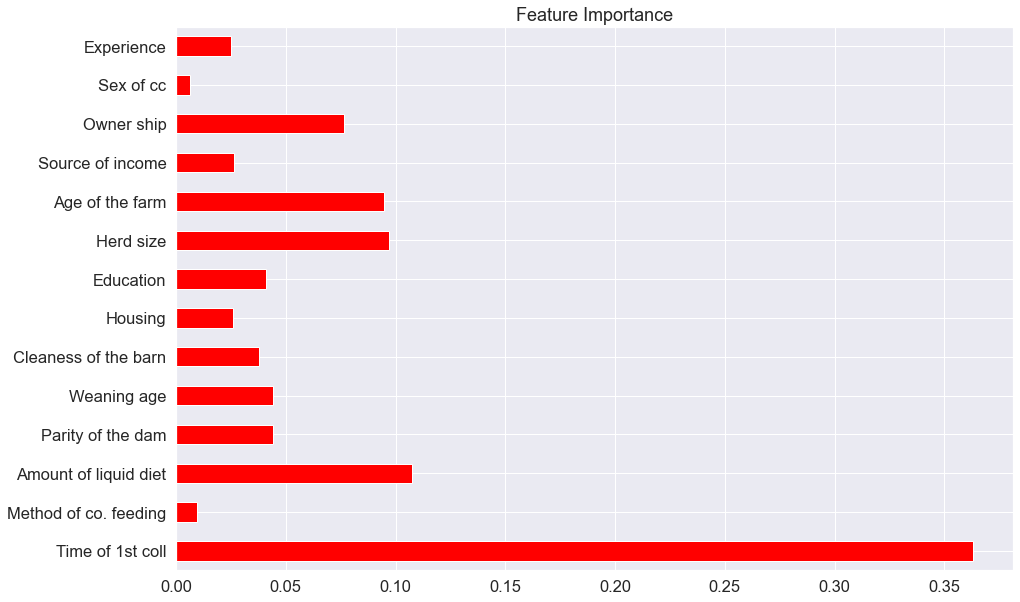

In [57]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(title="Feature Importance", color = 'Red', legend=False, figsize=(15,10));

# Save the Model

In [59]:
import pickle

pickle.dump(best_clf, open("Survival.pkl", "wb"))